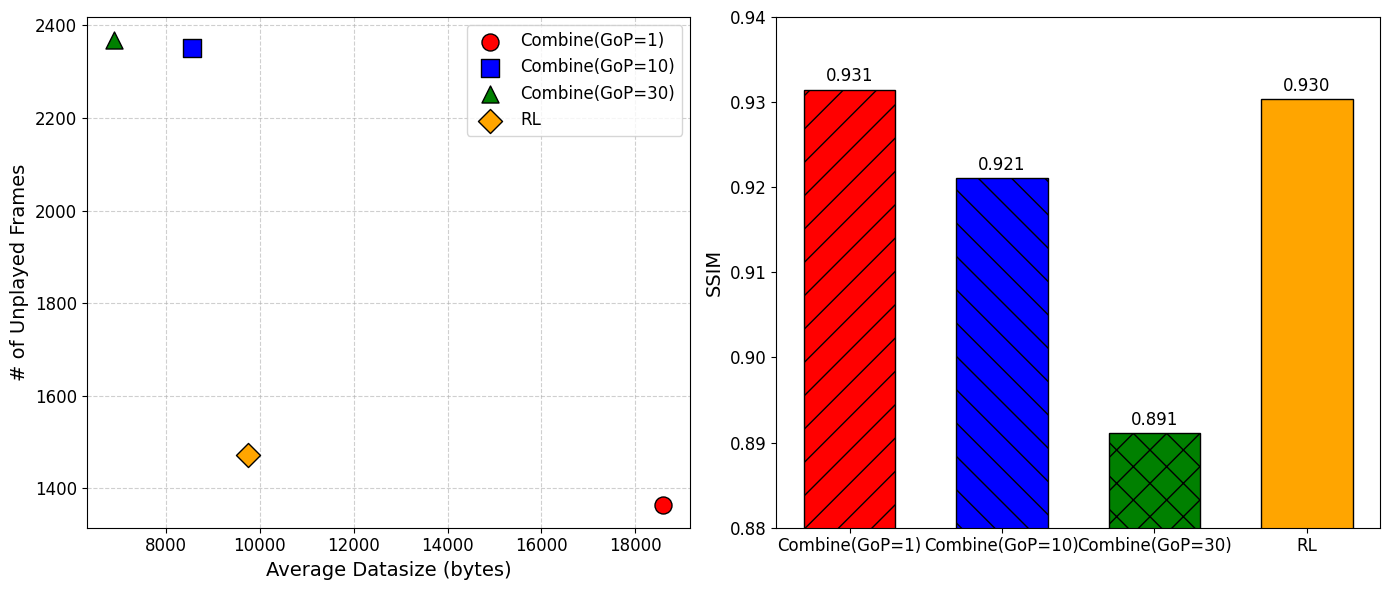

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = ['Combine(GoP=1)', 'Combine(GoP=10)', 'Combine(GoP=30)', 'RL']
average_datasize = [18586.14556, 8554.679794, 6889.232224, 9742.22570026334]
unplayed_frames = [1365, 2352, 2368, 1473]
ssim_values = [0.931453442539777, 0.921056232905772, 0.891106306765015, 0.930345750099532]

# 마커 스타일 및 색상 (왼쪽과 오른쪽 통일)
marker_styles = ['o', 's', '^', 'D']
common_colors = ['red', 'blue', 'green', 'orange']

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# 첫 번째 그래프: Scatter plot
plt.subplot(1, 2, 1)
for i in range(len(labels)):
    plt.scatter(average_datasize[i], unplayed_frames[i],
                marker=marker_styles[i],
                color=common_colors[i],
                edgecolor='black',
                s=150,
                label=labels[i],
                zorder=3)

plt.xlabel('Average Datasize (bytes)', fontsize=14)
plt.ylabel('# of Unplayed Frames', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6, zorder=0)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 두 번째 그래프: SSIM 막대 그래프
plt.subplot(1, 2, 2)
bar_positions = np.arange(len(labels))
hatches = ['/', '\\', 'x', '']

for i in range(len(labels)):
    bar = plt.bar(bar_positions[i], ssim_values[i],
                  color=common_colors[i],
                  edgecolor='black',
                  hatch=hatches[i],
                  width=0.6)
    plt.text(bar_positions[i], ssim_values[i] + 0.001, f'{ssim_values[i]:.3f}',
             ha='center', fontsize=12)

plt.xticks(bar_positions, labels, fontsize=12)
plt.ylabel('SSIM', fontsize=14)
plt.ylim(0.88, 0.94)
plt.yticks(fontsize=12)

# 전체 레이아웃
plt.tight_layout()
plt.savefig('result.png', dpi=300)
plt.show()


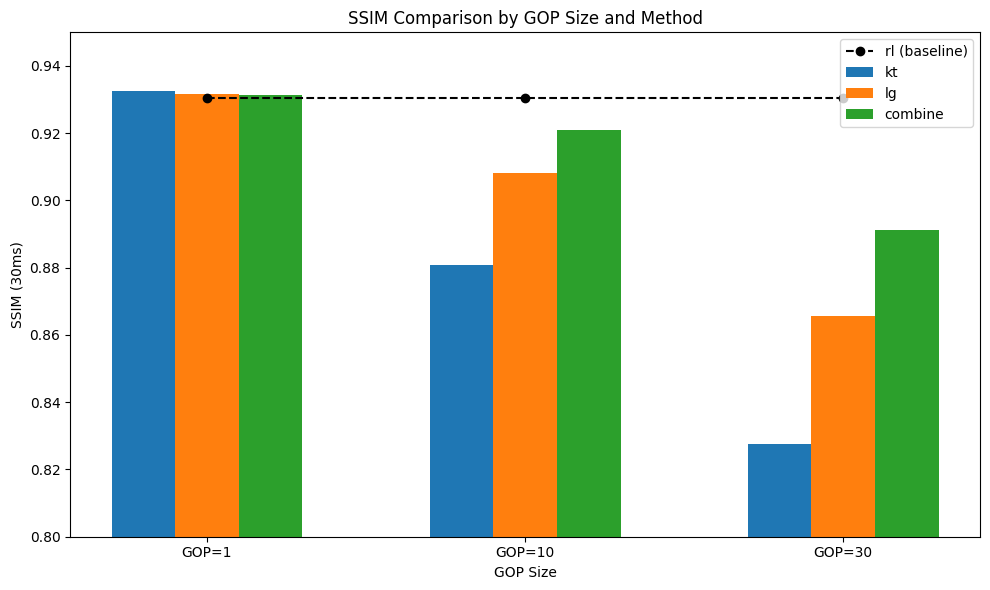

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 정의 (정밀한 SSIM 값)
labels = ['GOP=1', 'GOP=10', 'GOP=30']
kt = [0.932499470245097, 0.880819209257949, 0.827615465270856]
lg = [0.931547756308367, 0.908305776940050, 0.865578526170377]
combine = [0.931453442539777, 0.921056232905772, 0.891106306765015]
rl = [0.930345750099532] * 3  # baseline (고정 성능)

# x 좌표 및 막대 너비
x = np.arange(len(labels))
width = 0.2

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x - width, kt, width, label='kt')
plt.bar(x, lg, width, label='lg')
plt.bar(x + width, combine, width, label='combine')
plt.plot(x, rl, linestyle='--', marker='o', color='black', label='rl (baseline)')

# 라벨, 제목 등 설정
plt.ylabel('SSIM (30ms)')
plt.xlabel('GOP Size')
plt.title('SSIM Comparison by GOP Size and Method')
plt.xticks(x, labels)
plt.ylim(0.8, 0.95)
plt.legend()

# 격자선 제거
# plt.grid(True, axis='y') 없음

plt.tight_layout()
plt.savefig('/home/songmu/Downloads/ssim_comparison.png')
plt.show()


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# 저장 경로
save_dir = "/home/songmu/Downloads"

# 데이터 정의
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Unplayed frames': [
        4476, 6856, 7079, 3193, 4979, 4994, 1365, 2352, 2368, 1473,
        655, 989, 1014, 452, 707, 811, 124, 177, 202, 392,
        72, 137, 124, 48, 94, 116, 9, 25, 21, 48
    ],
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ],
    'avg_datasize': [
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 9742.2257,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3517.954034,
        9293.07278, 4277.339897, 3444.616112, 9293.07278, 4277.339897, 3444.616112,
        18586.14556, 8554.679794, 6889.232224, 3158.241322
    ]
})

# 스타일 정의
method_styles = {
    'kt': {'marker': 'o', 'color': 'blue'},
    'lg': {'marker': 's', 'color': 'green'},
    'combine': {'marker': '^', 'color': 'orange'},
    'RL': {'marker': 'D', 'color': 'black'},
}

gop_fillstyles = {
    1: 'full',
    10: 'left',
    30: 'none',
}

# threshold별 figure 생성 및 저장
thresholds = [30, 40, 100]

for threshold in thresholds:
    fig, ax = plt.subplots(figsize=(8, 6))
    subset = data[data['threshold'] == threshold]
    legend_elements = []

    for idx, row in subset.iterrows():
        method = row['method']
        gop = row['gop']
        datasize = row['avg_datasize']
        unplayed = row['Unplayed frames']

        style = method_styles[method]
        fillstyle = gop_fillstyles[gop]
        label = f"{method}-GOP{gop}"

        show_legend = label not in [entry.get_label() for entry in legend_elements]

        ax.plot(
            datasize, unplayed,
            marker=style['marker'],
            color=style['color'],
            markerfacecolor=style['color'],
            markeredgecolor='black',
            markersize=10,
            linestyle='None',
            fillstyle=fillstyle,
            label=label if show_legend else ""
        )

        if show_legend:
            legend_elements.append(
                plt.Line2D([0], [0],
                           marker=style['marker'],
                           color='w',
                           label=label,
                           markerfacecolor=style['color'],
                           markeredgecolor='black',
                           markersize=10,
                           linewidth=0,
                           fillstyle=fillstyle)
            )

    ax.set_title(f"Threshold = {threshold}")
    ax.set_xlabel("Average Data Size")
    ax.set_ylabel("Unplayed Frames")
    ax.legend(handles=legend_elements, title="Method-GOP", loc='best')
    ax.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()

    # 저장
    filename = f"threshold_{threshold}.png"
    save_path = os.path.join(save_dir, filename)
    plt.savefig(save_path)
    plt.close()

    print(f"✅ Saved: {save_path}")


✅ Saved: /home/songmu/Downloads/threshold_30.png
✅ Saved: /home/songmu/Downloads/threshold_40.png
✅ Saved: /home/songmu/Downloads/threshold_100.png


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# 저장 경로
save_dir = "/home/songmu/Downloads"

# 데이터 정의
data = pd.DataFrame({
    'method': [
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL',
        'kt', 'kt', 'kt', 'lg', 'lg', 'lg', 'combine', 'combine', 'combine', 'RL'
    ],
    'gop': [
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1,
        1, 10, 30, 1, 10, 30, 1, 10, 30, 1
    ],
    'threshold': [30]*10 + [40]*10 + [100]*10,
    'Orphan frames': [
        0, 2379, 2602, 0, 1786, 1801, 0, 987, 1003, 92,
        0, 334, 359, 0, 255, 359, 0, 53, 78, 41,
        0, 65, 52, 0, 46, 68, 0, 16, 12, 0
    ]
})

thresholds = [30, 40, 100]
methods = ['kt', 'lg', 'combine']
gops = [1, 10, 30]

for threshold in thresholds:
    fig, ax = plt.subplots(figsize=(12, 6))
    subset = data[data['threshold'] == threshold]

    x_labels = []
    bar_heights = []
    x_positions = []
    xpos = 0

    rl_lines = {}

    # 막대그래프용 데이터 정리
    for method in methods:
        for gop in gops:
            label = f"{method}-GOP{gop}"
            x_labels.append(label)
            x_positions.append(xpos)

            val = subset[(subset['method'] == method) & (subset['gop'] == gop)]['Orphan frames'].values
            bar_heights.append(val[0] if len(val) > 0 else 0)

            xpos += 1

    # 막대그래프 그리기
    ax.bar(x_positions, bar_heights, color='skyblue', edgecolor='black', label='kt/lg/combine')

    # RL 기준선 그리기
    for gop in gops:
        rl_val = subset[(subset['method'] == 'RL') & (subset['gop'] == gop)]['Orphan frames'].values
        if len(rl_val) == 0:
            continue
        y = rl_val[0]
        # 해당 GOP에 대응되는 x 위치 3개
        x_rl_positions = [i for i, label in enumerate(x_labels) if label.endswith(f"GOP{gop}")]
        ax.hlines(y, x_rl_positions[0]-0.4, x_rl_positions[-1]+0.4, colors='red', linestyles='dashed', label=f'RL-GOP{gop}' if gop == 1 else None)

    # X축
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=45, ha='right')
    ax.set_ylabel("Orphan Frames")
    ax.set_title(f"Orphan Frames by Method and GOP (Threshold = {threshold})")
    ax.grid(True, linestyle='--', alpha=0.3)

    # 범례 (RL은 하나만 표시)
    ax.legend()

    plt.tight_layout()

    # 저장
    save_path = os.path.join(save_dir, f"orphan_guideline_threshold_{threshold}.png")
    plt.savefig(save_path)
    plt.close()

    print(f"📦 Saved: {save_path}")


📦 Saved: /home/songmu/Downloads/orphan_guideline_threshold_30.png
📦 Saved: /home/songmu/Downloads/orphan_guideline_threshold_40.png
📦 Saved: /home/songmu/Downloads/orphan_guideline_threshold_100.png
